#Vino

Utilizando estos datos sobre vino escriba un notebook de IPython / Jupyter que clasifique de la mejor manera los datos usando: k-means (¿cuántos clusters son el numero óptimo?), PCA (¿cuántas componentes son las óptimas?) y random forests (¿cuántos árboles son las óptimos?). Justifique cuál de los tres metodos produce los mejores resultados de clasificación en este caso.

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

#K-Clusters

In [16]:
df = pd.read_csv('wine.data')
df.columns = ['class', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 
              'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue', 
              'OD280/OD315 of diluted wines', 'proline']

wine_class = df['class']
wine_alcohol = df['alcohol']
wine_malic = df['malic acid']
wine_ash = df['ash']
wine_alcalinity = df['alcalinity of ash']
wine_magnesium = df['magnesium']
wine_phenols = df['total phenols']
wine_flavanoids = df['flavanoids']
wine_nonfavanoids = df['nonflavanoid phenols']
wine_proanth = df['proanthocyanins']
wine_color = df['color intensity']
wine_hue = df['hue']
wine_OD = df['OD280/OD315 of diluted wines']
wine_proline = df['proline']

df = df.drop('class', 1)

In [17]:
np.random.seed(1)

In [18]:
n_wines_training = int(len(wine_class)*0.9)
n_wines = len(wine_class) - n_wines_training

total_range = range(0, len(wine_class))
np.random.shuffle(total_range)

wine_indices_training = total_range[:n_wines_training]
wine_indices = total_range[n_wines_training:]

In [19]:
data_training = df.iloc[wine_indices_training]
data = df.iloc[wine_indices]

targets_training = wine_class.iloc[wine_indices_training]
targets = wine_class.iloc[wine_indices]

Ahora hallamos los K clusters para n_wines_training valores de K

In [20]:
ks = np.zeros(n_wines_training-1) 
inertias = np.zeros(n_wines_training-1) #Sum of distances of samples to their closest cluster center.

In [21]:
for i in range(1, n_wines_training):

    km = KMeans(n_clusters=i)
    km.fit(data_training, targets_training)

    ks[i-1] = i
    inertias[i-1] = km.inertia_

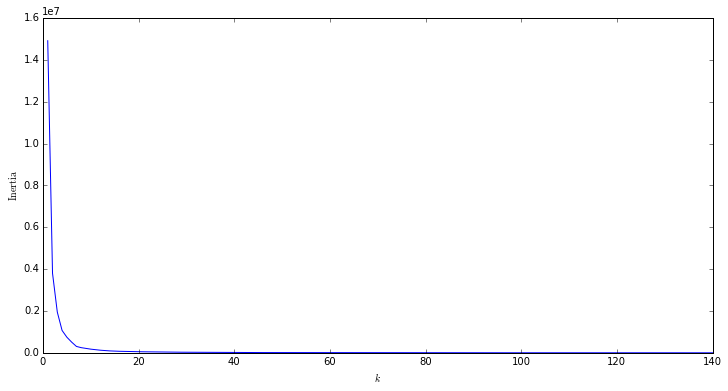

In [22]:
plt.figure(figsize=(12,6))
plt.plot(ks, inertias)
plt.xlabel('$k$')
plt.ylabel('$\mathrm{Inertia}$')

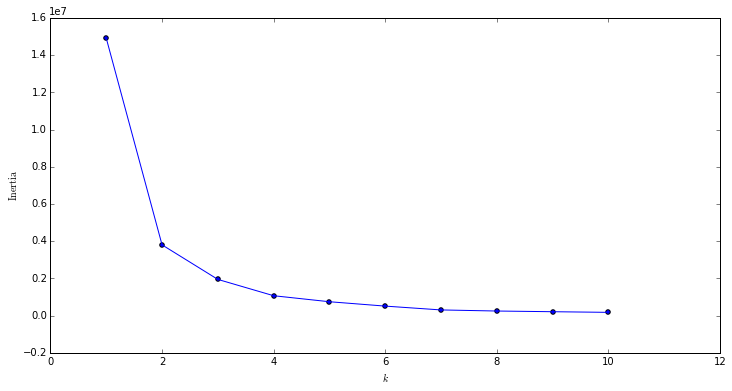

In [23]:
plt.figure(figsize=(12,6))
plt.plot(ks[:10], inertias[:10])
plt.scatter(ks[:10], inertias[:10])
plt.xlabel('$k$')
plt.ylabel('$\mathrm{Inertia}$')

Entre más grande es $k$, menor es la inercia, lo cual es esperado porque entre más cluster existan se pueden agrupar más cercanos. Sin embargo, con esta logica terminaríamos escgoiendo el número de clusters igual al numero de vinos, lo cual no es lo que queremos. Para evitar esto, no vamos a escoger la inercia minima, sino que vamos a analizar el cambio de inercia por k. Queremos encontrar el punto en el que éste cambio se sature.

(0, 12000000.0)

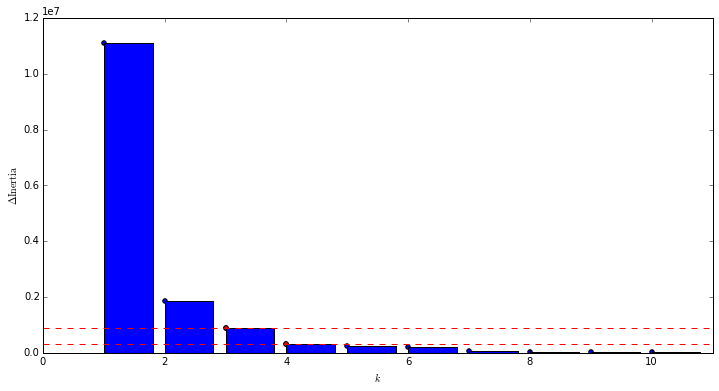

In [47]:
plt.figure(figsize=(12,6))
plt.bar(ks[:10], inertias[:10]-inertias[1:11])
plt.scatter(ks[:10], inertias[:10]-inertias[1:11])
plt.scatter(ks[2:4], inertias[2:4]-inertias[3:5], c='r')
plt.hlines(inertias[2:4]-inertias[3:5], 0, 11, linestyle='--', color='r')
plt.xlabel('$k$')
plt.ylabel('$\Delta\mathrm{Inertia}$')
plt.xlim(0,11)
plt.ylim(0,1.2*1e7)

Podemos ver que hay 2 candidatos a $k$ que corresponden a 3 y 4. En la grafica de arriba se ve en 3 la diferencia de inercia entre 3 y 4. En 4 se ve la diferencia de inercia entre 4 y 5. Ahora usaremos otra tecnica para determinar entre $k=3$ y $k=4$ cúal es el número optimo de clusters. Vamos a ver cual de los 2 predice mejor el set de datos de pruebas.

In [57]:
km3 = KMeans(n_clusters=3)
km3.fit(data_training)

print km3.labels_
print np.array(targets_training)

predicted_classes_3 = km3.predict(data_training)

lab0 = np.where(km3 == 0)[0]
lab1 = np.where(km3 == 1)[0]
lab2 = np.where(km3 == 2)[0]

predicted_classes_3[lab0] = 3
predicted_classes_3[lab1] = 3
 



[2 0 2 2 1 2 0 1 0 0 1 1 0 2 0 0 0 2 0 2 1 0 2 2 1 0 1 1 1 0 0 2 0 1 2 0 0
 0 0 1 1 2 2 2 1 1 2 1 2 0 0 0 2 1 0 2 1 0 2 0 0 1 0 0 2 1 0 1 0 1 2 2 2 2
 0 1 0 1 0 0 1 0 1 2 2 0 2 2 2 0 2 0 0 0 2 0 0 0 2 1 2 1 0 2 0 0 0 2 0 2 2
 2 1 0 0 2 0 2 2 0 2 2 2 2 1 0 1 0 0 2 1 1 0 2 2 2 0 1 0 2 1]
[2 2 1 2 1 3 2 1 2 2 1 1 2 1 2 2 3 1 2 1 1 2 3 2 1 2 1 1 1 2 3 3 3 1 2 2 2
 3 2 1 1 2 2 1 1 1 2 1 1 2 2 2 3 1 2 2 1 2 3 2 2 1 3 3 2 1 2 1 2 1 3 3 3 3
 2 1 3 1 2 3 1 2 1 3 2 2 1 2 2 3 1 2 2 2 3 2 2 2 3 1 1 1 3 1 2 3 3 1 2 1 2
 2 1 3 2 3 3 3 2 2 2 3 3 2 1 2 1 3 2 2 1 1 2 1 1 1 3 1 3 3 1]


In [58]:
print len(np.where(targets_training-predicted_classes_3 != 0)[0])

89


In [26]:
km4 = KMeans(n_clusters=4)
km4.fit(data_training, targets_training)

predicted_classes_4 = km4.predict(data)

In [44]:
n_errors_3 = len(np.where(targets-predicted_classes_3 != 0)[0])
n_errors_4 = len(np.where(targets-predicted_classes_4 != 0)[0])

In [43]:
print np.array(targets)
print predicted_classes_3
print predicted_classes_4

[2 2 3 1 2 2 1 1 1 2 2 1 3 3 2 2 2 1 3 3 3 3 3 2 1 1 3 2 3 3 2 3 3 2 3 1]
[1 1 3 2 1 1 2 2 2 3 1 2 3 1 1 1 3 2 1 3 3 1 3 1 3 2 3 1 3 3 1 3 1 3 3 2]
[1 1 2 0 1 2 0 3 0 2 1 0 2 1 1 1 2 3 1 2 0 2 2 1 2 0 2 1 2 2 1 2 2 0 2 0]


In [45]:
n_errors_3

26

In [34]:
n_wines_training

141